In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [2]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,1:7]
data_y = FLT_1.iloc[:,7:10]

y1 = data_y['Cd'].to_numpy()
y2 = data_y['Cl'].to_numpy()
y3 = data_y['Cm'].to_numpy()

y1 = savgol_filter(y1,window_length=8000, polyorder=4)
y2 = savgol_filter(y2,window_length=8000, polyorder=4)
y3 = savgol_filter(y3,window_length=8000, polyorder=4)

data_y = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

data_y = pd.DataFrame(data_y)



In [25]:
FLT_1

,t(s),aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),x acceleration (m/s2),z acceleration (m/s2),Cd,Cl,Cm
0,0.00000,1.978644,1.994105,0.009835,50.741865,1.053801,-7.403692,0.050988,0.460989,0.001941
1,0.00012,1.978343,1.994686,0.009787,50.742590,1.054149,-7.405721,0.050972,0.461021,0.001953
2,0.00024,1.978041,1.995267,0.009738,50.743315,1.054484,-7.407809,0.050956,0.461052,0.001966
3,0.00036,1.977740,1.995847,0.009690,50.744040,1.054807,-7.409959,0.050941,0.461083,0.001978
4,0.00048,1.977439,1.996428,0.009642,50.744765,1.055118,-7.412167,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...,...,...,...
99995,11.99940,2.391689,2.924688,-0.012253,50.285324,0.749623,-9.715756,0.043411,0.416994,-0.004519
99996,11.99952,2.391753,2.924688,-0.012253,50.285324,0.749756,-9.716056,0.043395,0.416750,-0.004529
99997,11.99964,2.391817,2.924688,-0.012253,50.285324,0.749889,-9.716355,0.043379,0.416508,-0.004539
99998,11.99976,2.391882,2.924688,-0.012253,50.285324,0.750021,-9.716652,0.043364,0.416266,-0.004549


In [3]:
from sklearn.model_selection import train_test_split
FLT_2 = pd.read_excel('FLT 2 datasets.xlsx').drop(columns='t(s)').drop(columns='engine inclination (deg)')
FLT_2
xt = FLT_2[0:(len(FLT_2)-1)]
yt = FLT_2[1:(len(FLT_2))]

xmain2, x_2t, ymain2, y_2t = train_test_split(xt,yt, test_size=10000)
x_2t = DataFrame.sort_index(x_2t, ignore_index = True)
x_2t


,aoa(deg),pitch (deg),pitch speed (deg/sec),true speed(m/s),x acceleration (m/s2),z acceleration (m/s2)
0,2.291117,2.241554,0.005751,50.689404,0.996204,-9.876567
1,2.285739,2.261261,0.005922,50.689401,0.990352,-9.888309
2,2.279822,2.282984,0.006112,50.689398,0.983965,-9.901171
3,2.275729,2.298044,0.006244,50.689396,0.979588,-9.910019
4,2.272260,2.310837,0.006357,50.689394,0.975913,-9.917481
...,...,...,...,...,...,...
9995,1.528265,3.285667,0.012054,51.265878,0.782293,-9.434007
9996,1.528265,3.295489,0.012054,51.267015,0.783840,-9.430753
9997,1.528265,3.302360,0.012054,51.267812,0.784924,-9.428476
9998,1.528265,3.303341,0.012054,51.267925,0.785078,-9.428150


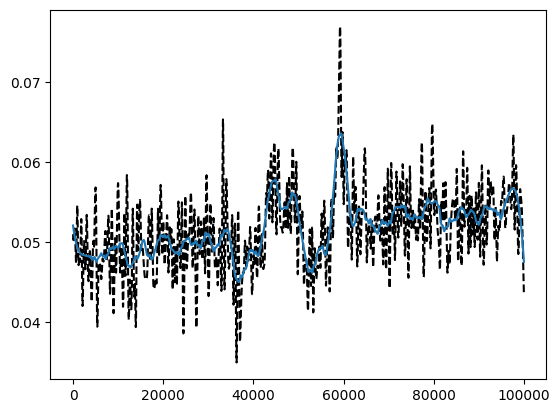

In [4]:
plt.plot(FLT_1['Cd'], 'k--')
plt.plot(data_y['Cd'])

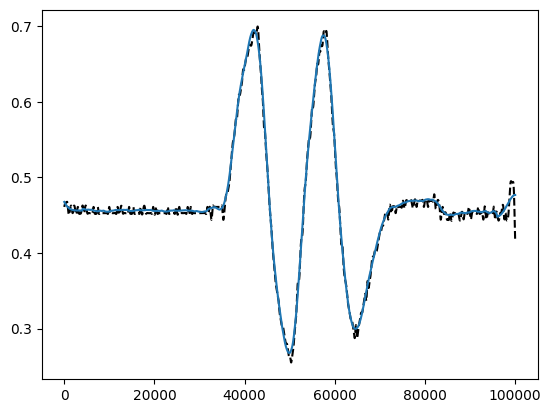

In [5]:
plt.plot(FLT_1['Cl'], 'k--')
plt.plot(data_y['Cl'])


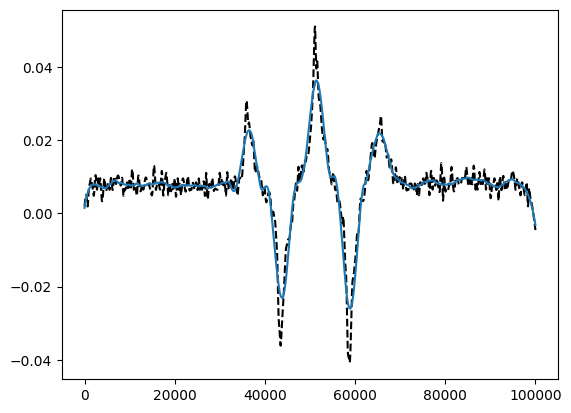

In [6]:
plt.plot(FLT_1['Cm'], 'k--')
plt.plot(data_y['Cm'])


In [7]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]


from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

x_test = DataFrame.sort_index(x_test, ignore_index= True)
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True)
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True)
y_training = DataFrame.sort_index(y_training, ignore_index= True)

x_test = x_test[0:len(x_test)].to_numpy()
y_test = y_test[0:len(y_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 6)
(10000, 3)
(10000, 6)
(10000, 3)
(79999, 6)
(79999, 3)


In [8]:

model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 2.6220e-04 - root_mean_squared_error: 0.0162 - val_loss: 1.0516e-04 - val_root_mean_squared_error: 0.0103
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 9.5262e-05 - root_mean_squared_error: 0.0098 - val_loss: 9.3264e-05 - val_root_mean_squared_error: 0.0097
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 8.0731e-05 - root_mean_squared_error: 0.0090 - val_loss: 8.0865e-05 - val_root_mean_squared_error: 0.0090
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 7.0718e-05 - root_mean_squared_error: 0.0084 - val_loss: 6.5128e-05 - val_root_mean_squared_error: 0.0081
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 6.5588e-05 - root_mean

In [9]:
model_2 = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0378 - root_mean_squared_error: 0.1945 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0426 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0405
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 8.6052e-04 - root_mean_squared_error: 0.0293 - val_loss: 7.3358e-04 - val_root_mean_squared_error: 0.0271
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 5.6758e-04 - root_mean_squared_error: 0.0238 - val_loss: 4.0828e-04 - val_root_mean_squared_error: 0.0202
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 2.8176e-04 - root_mean_squared_error: 

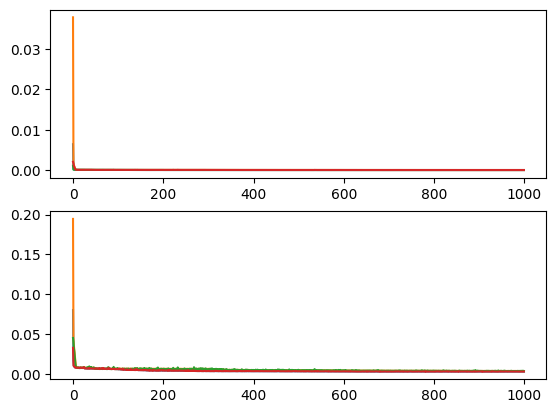

In [18]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'])
ax[0].plot(history_2.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].plot(history_2.history['val_loss'])

ax[1].plot(history.history['root_mean_squared_error'])
ax[1].plot(history_2.history['root_mean_squared_error'])

ax[1].plot(history_2.history['val_root_mean_squared_error'])
ax[1].plot(history.history['val_root_mean_squared_error'])



In [19]:
y_pred = model.predict(x_2t)
y_pred_2 = model_2.predict(x_2t)

313/313 [==============================] - 0s 1ms/step


In [20]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])

In [21]:
FLT_1_Tanh = DataFrame(y_pred_2, columns=['Cd','Cl','Cm'])

R-square sigmoid: -1.1288594015699034
R-square tanh: -1.1605276635077688


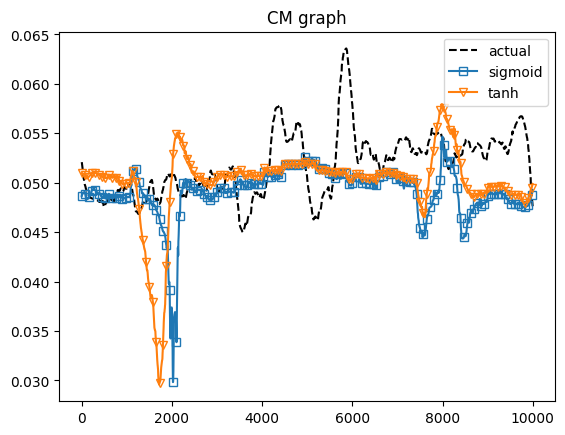

In [22]:
plt.title('CM graph')
plt.plot(y_test[:,0], 'k--', label = 'actual')
plt.plot(y_pred[:,0], marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
plt.plot(y_pred_2[:,0], marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
print('R-square sigmoid:',r2_score(y_test[:,0], y_pred[:,0]))
print('R-square tanh:',r2_score(y_test[:,0], y_pred_2[:,0]))
plt.legend()


R-square sigmoid: -0.7751803851093859
R-square tanh: -0.6710490899174795


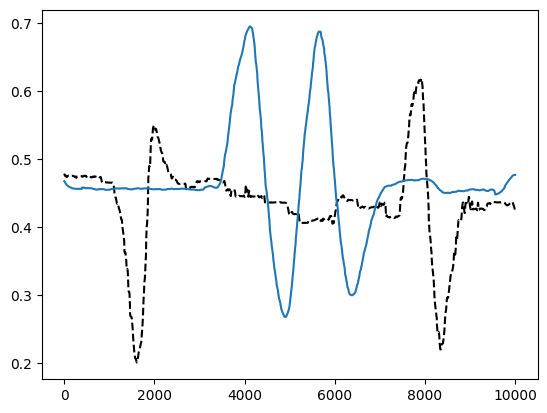

In [23]:
plt.plot(y_pred[:,1], 'k--')
plt.plot(y_test[:,1])
print('R-square sigmoid:',r2_score(y_test[:,1], y_pred[:,1]))
print('R-square tanh:',r2_score(y_test[:,1], y_pred_2[:,1]))



R-square sigmoid: -2.7190089272677773
R-square tanh: -1.3652530951757988


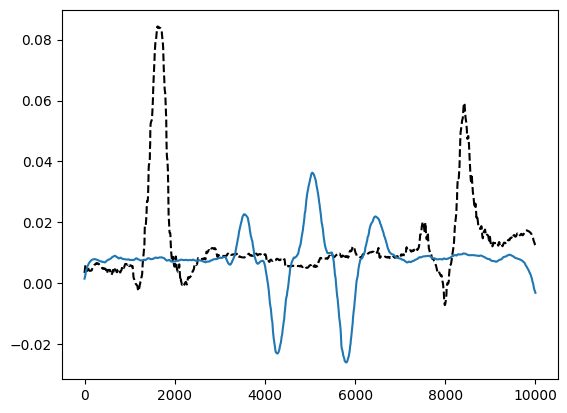

In [24]:
plt.plot(y_pred[:,2], 'k--')
plt.plot(y_test[:,2])
print('R-square sigmoid:',r2_score(y_test[:,2], y_pred[:,2]))
print('R-square tanh:',r2_score(y_test[:,2], y_pred_2[:,2]))


In [17]:
print ("Overall:")
print('R-square sigmoid:',r2_score(y_test, y_pred))
print('R-square tanh:',r2_score(y_test, y_pred_2))



Overall:
R-square sigmoid: -1.5410162379823535
R-square tanh: -1.065609949533681
